In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('images/Im101s.jpg')

In [3]:
box_blur = cv2.blur(image, (11, 11))
cv2.imwrite('folder/box_blur.jpg', box_blur)

False

In [4]:
gaussian_blur = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imwrite('folder/gaussian_blur.jpg', gaussian_blur)

False

اعمال فیلتر لاپلاس

In [5]:
laplacian_original = cv2.Laplacian(image, cv2.CV_64F)
laplacian_box = cv2.Laplacian(box_blur, cv2.CV_64F)
laplacian_gaussian = cv2.Laplacian(gaussian_blur, cv2.CV_64F)

نرمال سازی

In [6]:
laplacian_original_normalized = cv2.normalize(laplacian_original, None, 0, 255, cv2.NORM_MINMAX)
laplacian_box_normalized = cv2.normalize(laplacian_box, None, 0, 255, cv2.NORM_MINMAX)
laplacian_gaussian_normalized = cv2.normalize(laplacian_gaussian, None, 0, 255, cv2.NORM_MINMAX)

تبدیل به uint8

In [7]:
laplacian_original_normalized = np.uint8(laplacian_original_normalized)
laplacian_box_normalized = np.uint8(laplacian_box_normalized)
laplacian_gaussian_normalized = np.uint8(laplacian_gaussian_normalized)


In [8]:
cv2.imwrite('laplacian_original.jpg', laplacian_original_normalized)
cv2.imwrite('laplacian_box_blur.jpg', laplacian_box_normalized)
cv2.imwrite('laplacian_gaussian_blur.jpg', laplacian_gaussian_normalized)


True

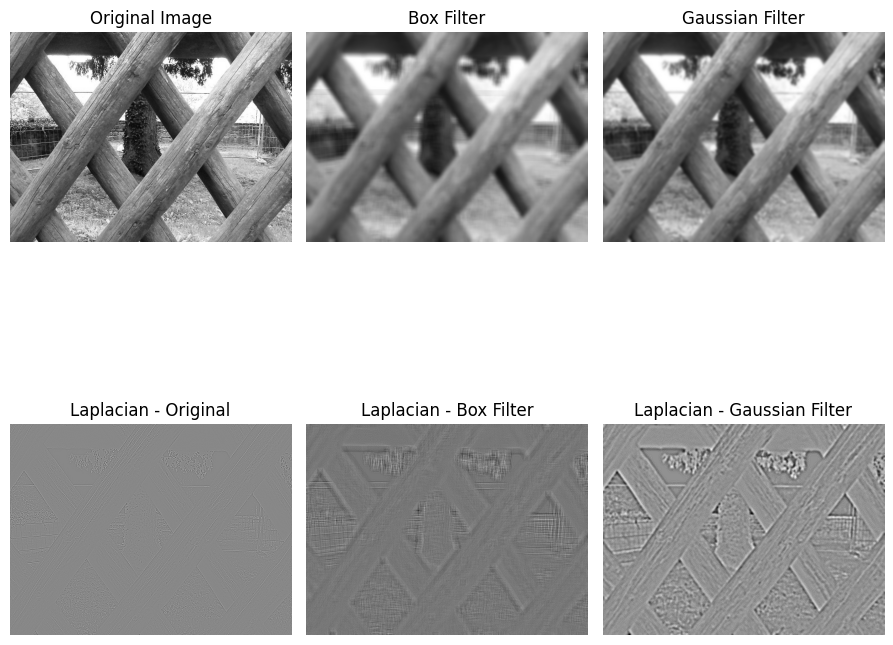

In [9]:
# نمایش تصاویر
plt.figure(figsize=(12, 8))

# تصویر اصلی
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# تصویر با فیلتر Box
plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB))
plt.title("Box Filter")
plt.axis('off')

# تصویر با فیلتر Gaussian
plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Filter")
plt.axis('off')

# تصویر لاپلاس از تصویر اصلی
plt.subplot(2, 4, 5)
plt.imshow(laplacian_original_normalized, cmap='gray')
plt.title("Laplacian - Original")
plt.axis('off')

# تصویر لاپلاس از تصویر با فیلتر Box
plt.subplot(2, 4, 6)
plt.imshow(laplacian_box_normalized, cmap='gray')
plt.title("Laplacian - Box Filter")
plt.axis('off')

# تصویر لاپلاس از تصویر با فیلتر Gaussian
plt.subplot(2, 4, 7)
plt.imshow(laplacian_gaussian_normalized, cmap='gray')
plt.title("Laplacian - Gaussian Filter")
plt.axis('off')

plt.savefig('output_image2.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

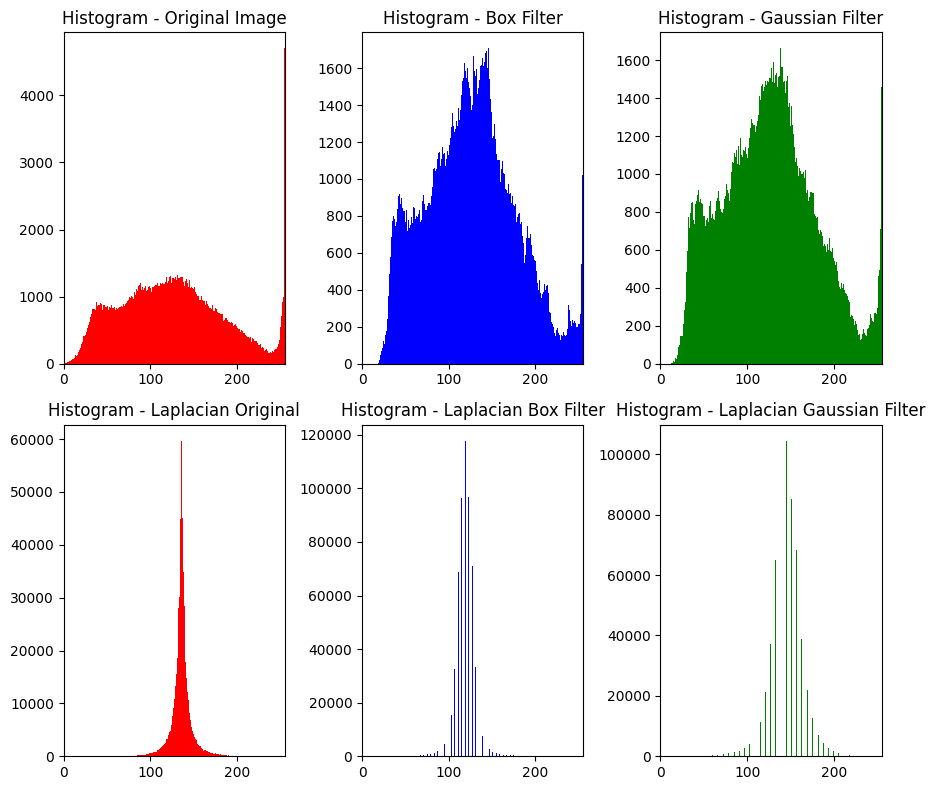

In [14]:

# رسم هیستوگرام برای تصاویر
plt.figure(figsize=(12, 8))

# هیستوگرام تصویر اصلی
plt.subplot(2, 4, 1)
plt.hist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=(0, 255), color='red')
plt.title("Histogram - Original Image")
plt.xlim(0, 255)

# هیستوگرام تصویر با فیلتر Box
plt.subplot(2, 4, 2)
plt.hist(cv2.cvtColor(box_blur, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=(0, 255), color='blue')
plt.title("Histogram - Box Filter")
plt.xlim(0, 255)

# هیستوگرام تصویر با فیلتر Gaussian
plt.subplot(2, 4, 3)
plt.hist(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2GRAY).ravel(), bins=256, range=(0, 255), color='green')
plt.title("Histogram - Gaussian Filter")
plt.xlim(0, 255)

# هیستوگرام لاپلاس از تصویر اصلی
plt.subplot(2, 4, 5)
plt.hist(laplacian_original_normalized.ravel(), bins=256, range=(0, 255), color='red')
plt.title("Histogram - Laplacian Original")
plt.xlim(0, 255)

# هیستوگرام لاپلاس از تصویر با فیلتر Box
plt.subplot(2, 4, 6)
plt.hist(laplacian_box_normalized.ravel(), bins=256, range=(0, 255), color='blue')
plt.title("Histogram - Laplacian Box Filter")
plt.xlim(0, 255)

# هیستوگرام لاپلاس از تصویر با فیلتر Gaussian
plt.subplot(2, 4, 7)
plt.hist(laplacian_gaussian_normalized.ravel(), bins=256, range=(0, 255), color='green')
plt.title("Histogram - Laplacian Gaussian Filter")
plt.xlim(0, 255)


plt.savefig('output_hist2.png', dpi=400, bbox_inches='tight')
plt.tight_layout()
plt.show()